## Introduction

K-means is a clustering algorithm used in unsupervised machine learning to group similar data points together. The algorithm is widely used for a variety of tasks, such as image segmentation, customer segmentation, and anomaly detection.

In K-means, the user specifies the number of clusters they want the algorithm to form. The algorithm then iteratively assigns each data point to the nearest centroid (mean) of a cluster and updates the centroid based on the mean of all the points assigned to that cluster. The algorithm continues this process until the centroids no longer change significantly or the maximum number of iterations is reached. The K-means algorithm can be sensitive to the initial position of the centroids, as it can get stuck in local optima. Therefore, multiple runs with different initializations are typically performed to find the best solution. Additionally, the user must specify the number of clusters they want the algorithm to form, which can be difficult if the optimal number of clusters is unknown.

'Customer Segmentation using K-Means', involves using the K-Means algorithm to group customers into distinct segments based on their purchasing behavior. The goal of this project is to help businesses better understand their customer base and tailor their marketing strategies and product offerings to specific segments. 

## Import the Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [6]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.shape

(200, 5)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
df.duplicated().value_counts()

False    200
Name: count, dtype: int64

## Exploratory Data Analysis

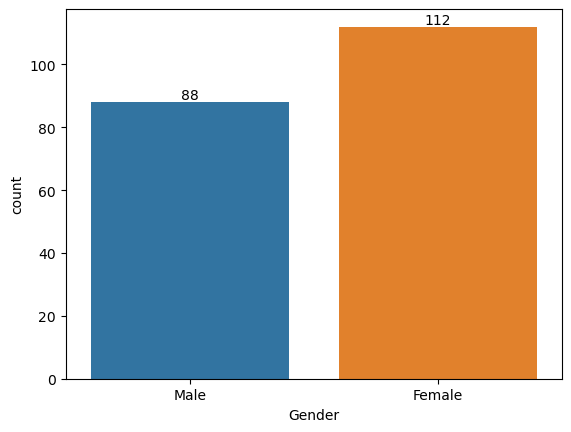

In [12]:
ax = sns.countplot(x='Gender', data=df)
ax.bar_label(container=ax.containers[0],labels = df['Gender'].value_counts(ascending = True))
plt.show()

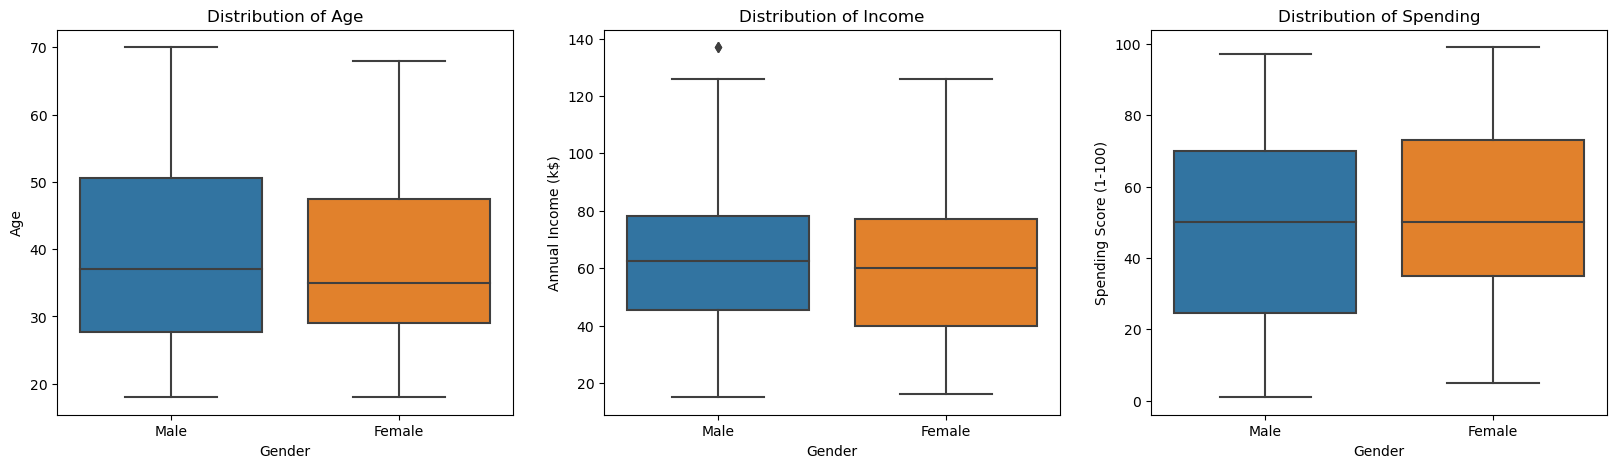

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x=df.Gender, y=df.Age)
plt.title('Distribution of Age')

plt.subplot(1,3,2)
sns.boxplot(x=df.Gender, y=df['Annual Income (k$)'])
plt.title('Distribution of Income')

plt.subplot(1,3,3)
sns.boxplot(x=df.Gender, y=df['Spending Score (1-100)'])
plt.title('Distribution of Spending')
plt.show()

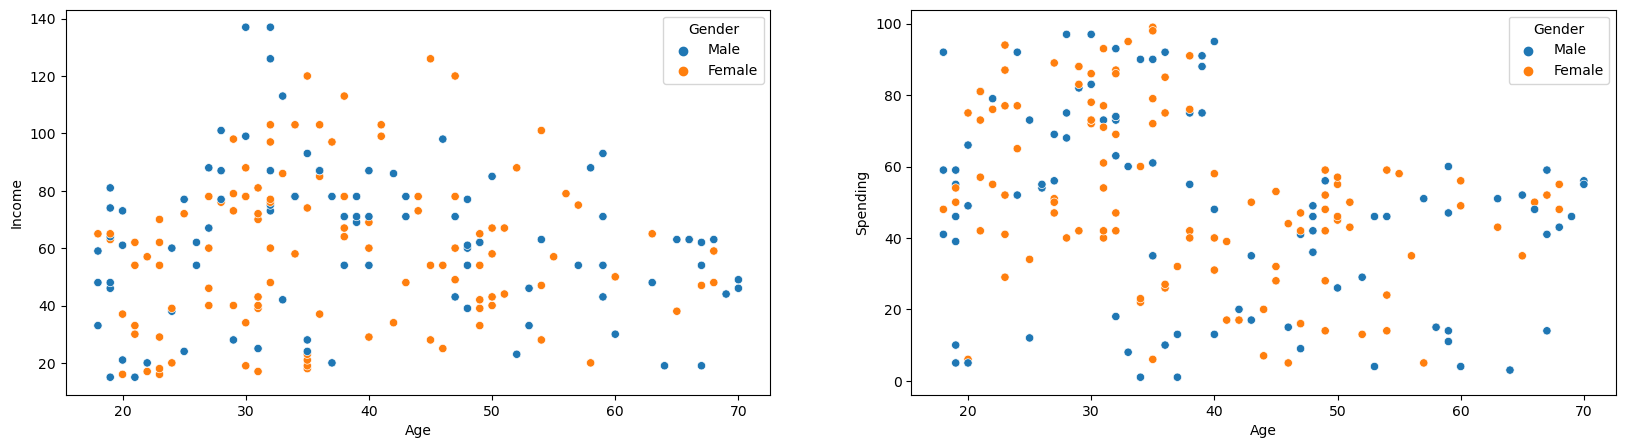

In [14]:
female = df[df.Gender == 'Female']
male = df[df.Gender == 'Male']

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.scatterplot(data = df, x='Age', y='Annual Income (k$)', hue='Gender')
plt.xlabel('Age')
plt.ylabel('Income')

plt.subplot(1,2,2)
sns.scatterplot(data = df, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.xlabel('Age')
plt.ylabel('Spending')
plt.show()

## KMeans Clustering

In [15]:
x = df.iloc[:,[3,4]].values

In [16]:
wcss = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [17]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156595,
 21850.165282585636,
 19672.07284901432]

## Choosing the Number of Clusters

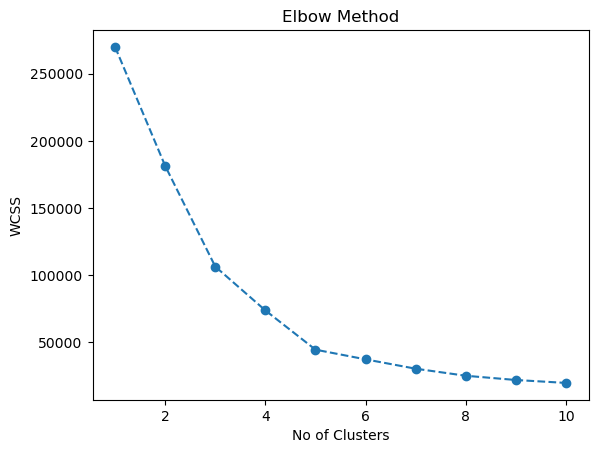

In [18]:
plt.plot(range(1,11), wcss, 'o--')
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

plt.show()

In [19]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y = kmeans.fit_predict(x)
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [20]:
df['Cluster'] = kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


## Visualising the Clusters

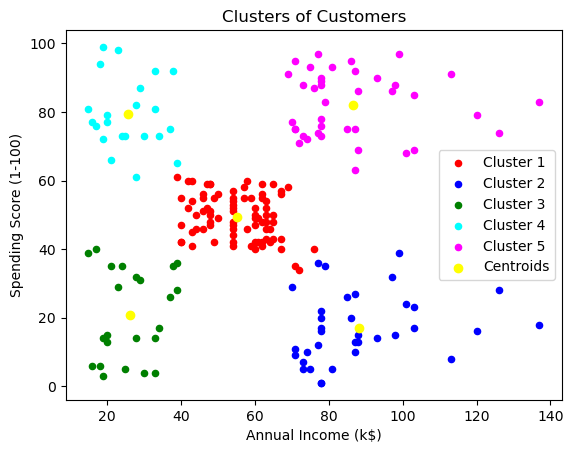

In [21]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(x[y == 3, 0], x[y == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y == 4, 0], x[y == 4, 1], s = 20, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Cluster Analysis

<div class="alert alert-success">
    <b>Cluster 1:</b> Average Income, Average Spending Score <br>
    <b>Cluster 2:</b> High Income, Low Spending Score <br>
    <b>Cluster 3:</b> Low Income, Low Spending Score <br>
    <b>Cluster 4:</b> Low Income, High Spending Score <br>
    <b>Cluster 5:</b> High Income, High Spending Score <br>
</div>

In [22]:
oneData = df.iloc[y == 0, :]
twoData = df.iloc[y == 1, :]
threeData = df.iloc[y == 2, :]
fourData = df.iloc[y == 3, :]
fiveData = df.iloc[y == 4, :]

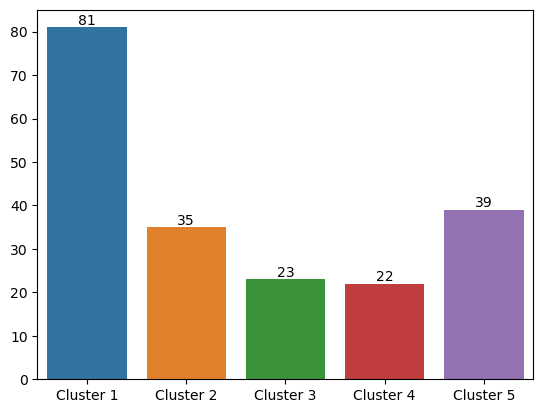

In [23]:
ax = sns.barplot(x = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
                 y = [len(oneData), len(twoData), len(threeData), len(fourData), len(fiveData)])
ax.bar_label(container = ax.containers[0],labels = [len(oneData), len(twoData), len(threeData), len(fourData), len(fiveData)])
plt.show()

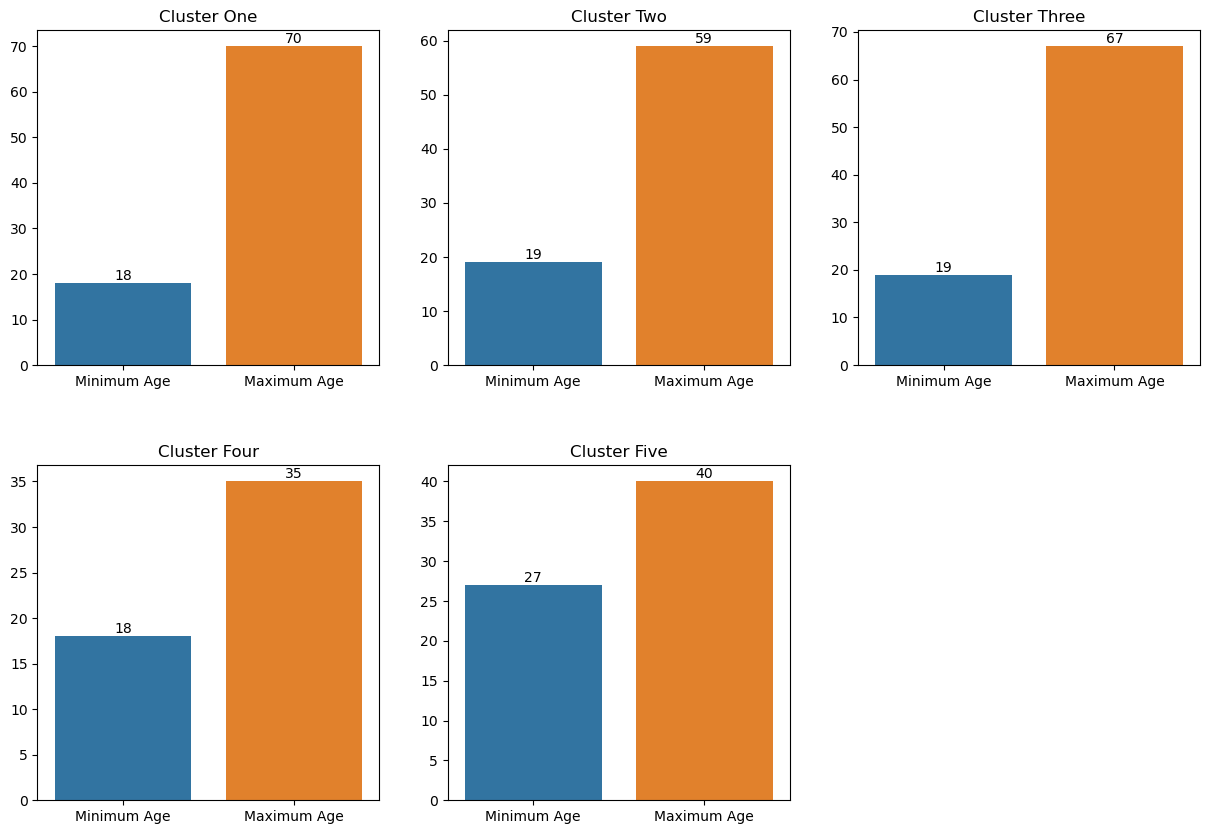

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [oneData['Age'].min(), oneData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [oneData['Age'].min(), oneData['Age'].max()])
plt.title('Cluster One')

plt.subplot(2,3,2)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [twoData['Age'].min(), twoData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [twoData['Age'].min(), twoData['Age'].max()])
plt.title('Cluster Two')

plt.subplot(2,3,3)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [threeData['Age'].min(), threeData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [threeData['Age'].min(), threeData['Age'].max()])
plt.title('Cluster Three')

plt.subplot(2,3,4)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [fourData['Age'].min(), fourData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [fourData['Age'].min(), fourData['Age'].max()])
plt.title('Cluster Four')

plt.subplot(2,3,5)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [fiveData['Age'].min(), fiveData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [fiveData['Age'].min(), fiveData['Age'].max()])
plt.title('Cluster Five')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()

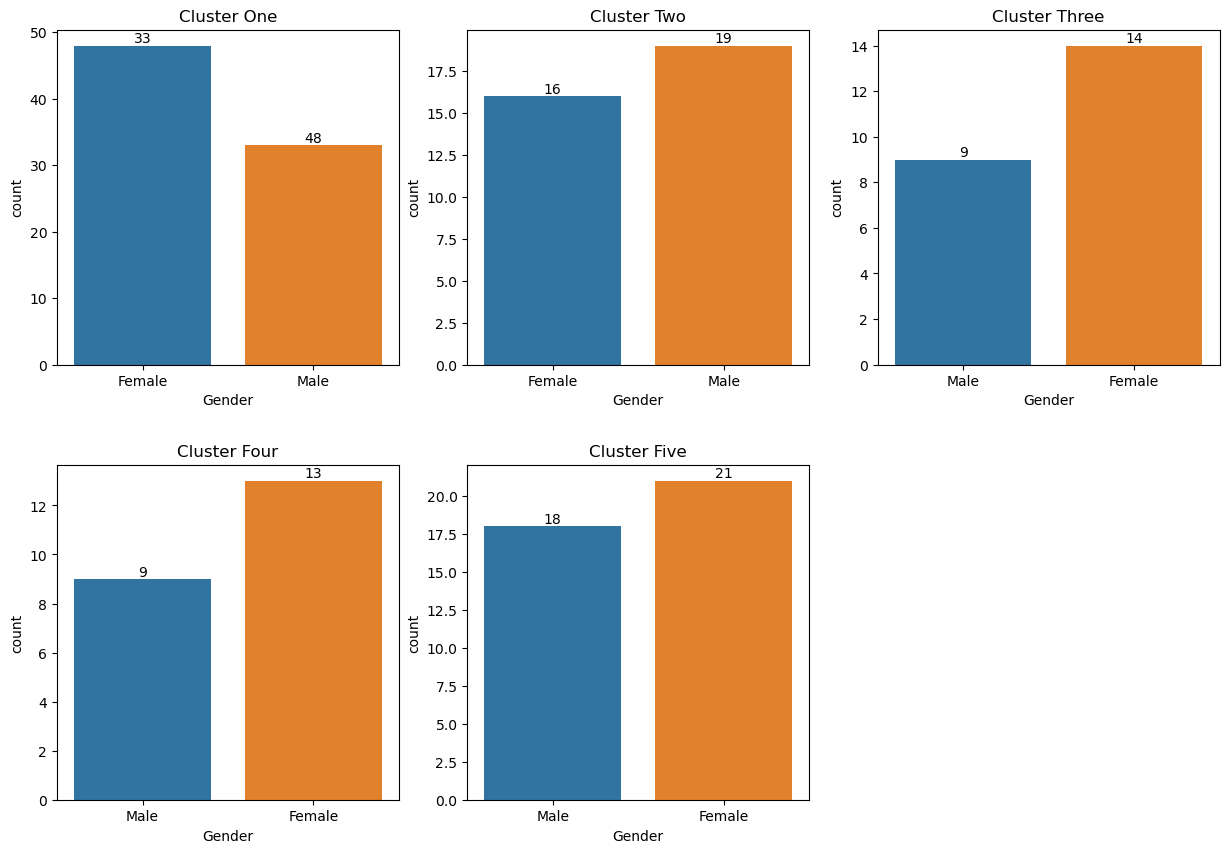

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
ax = sns.countplot(x = 'Gender', data = oneData)
ax.bar_label(container = ax.containers[0],labels = oneData['Gender'].value_counts(ascending = True))
plt.title('Cluster One')

plt.subplot(2,3,2)
ax = sns.countplot(x = 'Gender', data = twoData)
ax.bar_label(container = ax.containers[0],labels = twoData['Gender'].value_counts(ascending = True))
plt.title('Cluster Two')

plt.subplot(2,3,3)
ax = sns.countplot(x = 'Gender', data = threeData)
ax.bar_label(container = ax.containers[0],labels = threeData['Gender'].value_counts(ascending = True))
plt.title('Cluster Three')

plt.subplot(2,3,4)
ax = sns.countplot(x = 'Gender', data = fourData)
ax.bar_label(container = ax.containers[0],labels = fourData['Gender'].value_counts(ascending = True))
plt.title('Cluster Four')

plt.subplot(2,3,5)
ax = sns.countplot(x = 'Gender', data = fiveData)
ax.bar_label(container = ax.containers[0],labels = fiveData['Gender'].value_counts(ascending = True))
plt.title('Cluster Five')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()

## Conclusion

**Based on the analysis, these are the final observations from the dataset for each cluster:**

* Cluster 1 occupies the maximum amount of people that earn decent as well as spend a decent amount. They should be sent regular updates and promotional offers so as to keep their interest. <br>
* Cluster 2 has high income but they do not shop as much. These people should be targeted since they have the spending capactiy. Their past data should be analysed so as to send them specific promotional messages to get their interest back. <br>
* Cluster 3 should be ignored since they do not have the spending capacity nor do they show interest in spending. <br>
* Cluster 4 is a risky group since they do not have the spending capacity yet they have a high spending score. They should be sent more discount based coupons. <br>
* Cluster 5 is the best group since they have a high income and a high spending score as well. They should be sent regular updates and promotions.